In [1]:
import numpy as np
import networkx as nx

from src.diffusion_models import independent_cascade_model, linear_threshold_model, plot_diffusion_results, illustrate_diffusion, illustrate_diffusion_pyvis
from src.graph import graph_loader, create_polarized_graph
from src.seed import seed_degree, seed_random 


In [2]:
# TODO: add a function which illustrates the spread of the influence, 
# i.e. as a line chart showing after each itteration how many new nodes are influenced
# i.e. as a animation showing the spread of the influence in the real graph

# TODO: in the generate polarized graph incoporate already the coloring of the nodes
# think about a logic of coloring the polarized groups 


In [3]:
G = create_polarized_graph(200, 0.2, 0.01)
seeds = seed_random(G, 50)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 200
Number of edges: 4089


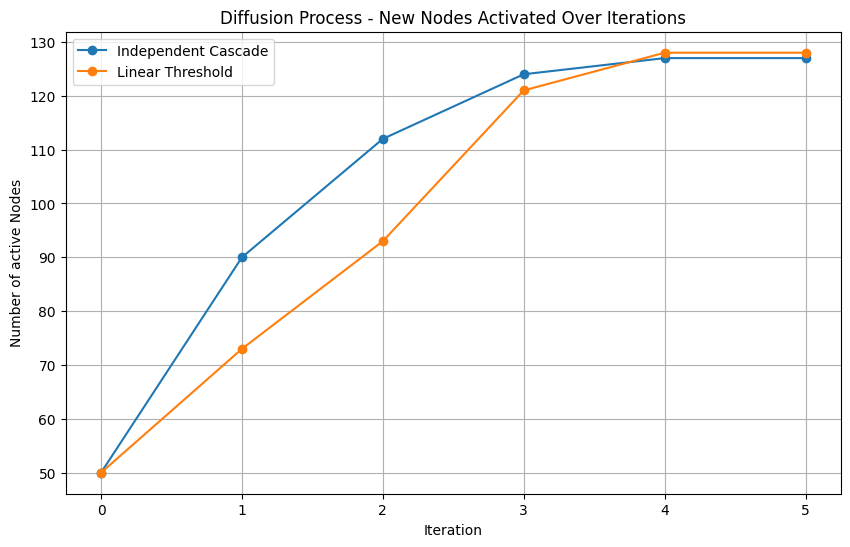

diffusion_snapshot_1.html
diffusion_snapshot_2.html
diffusion_snapshot_3.html
diffusion_snapshot_4.html


In [4]:
thresholds = {node: 1 for node in G.nodes()}
# Run models
ic_results = independent_cascade_model(G, seeds, 1)
lt_results = linear_threshold_model(G, seeds, thresholds)
# Visualize results
plot_diffusion_results([ic_results[2], lt_results[2]], ["Independent Cascade", "Linear Threshold"])
illustrate_diffusion_pyvis(G, ic_results[3], 4)

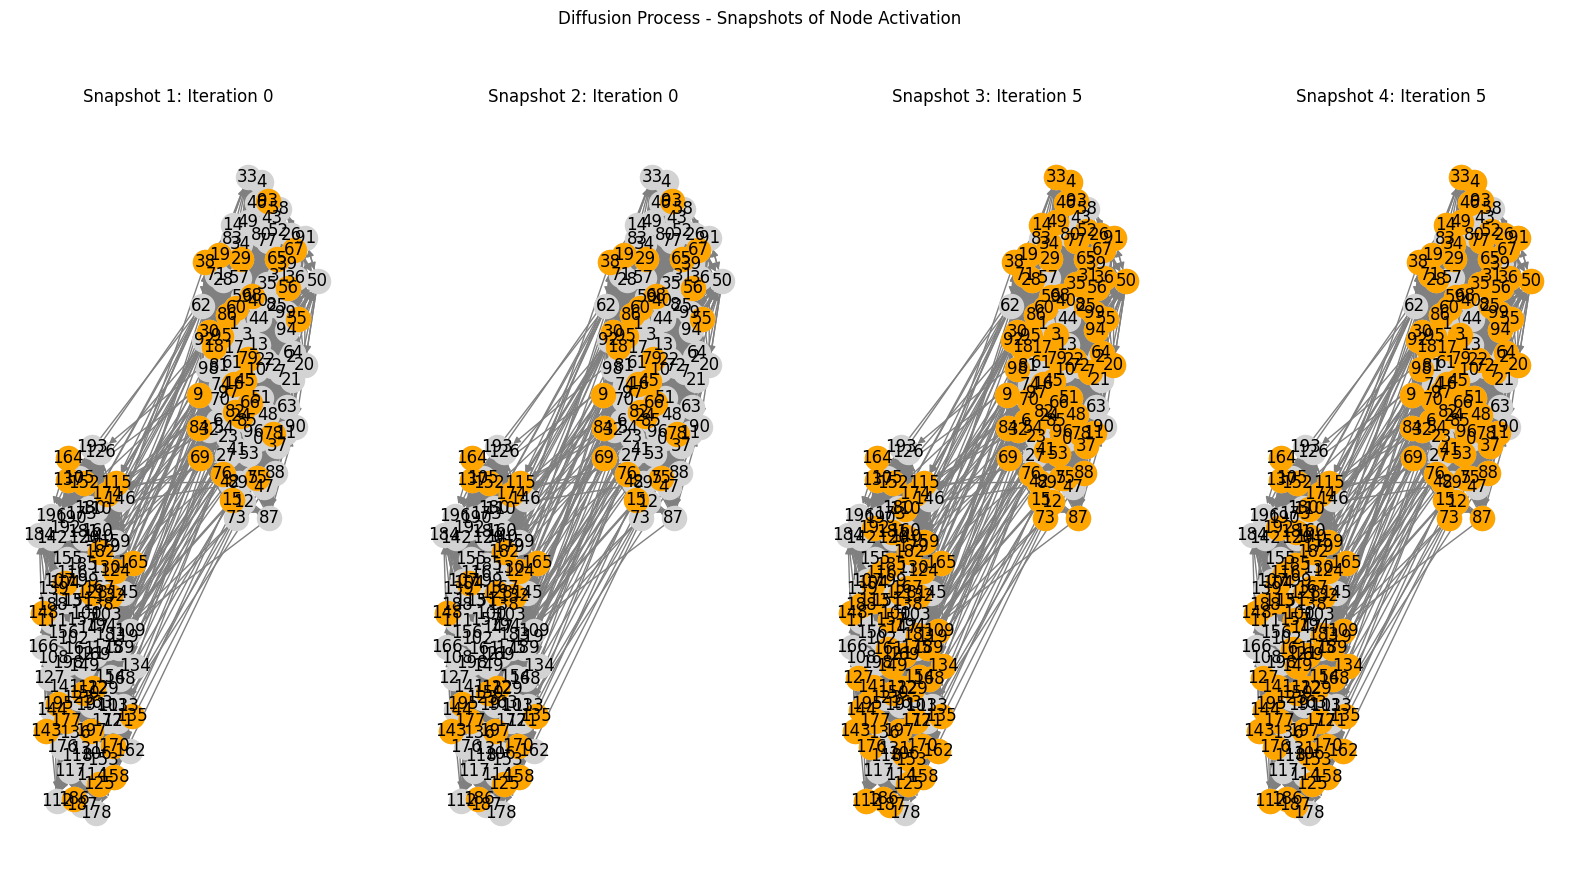

In [5]:
illustrate_diffusion(G, ic_results[3], 4)

In [ ]:
# Usage
G = graph_loader('datasets/wiki_vote/Wiki-Vote.txt')
seeds = seed_random(G, 100)

In [4]:
icm_count, icm_nodes  = independent_cascade_model(G, seeds, 1)
print('ICM: Number of influent nodes: {}'.format(icm_count))

# TODO: think about a better was to set the thresholds, also needs to be adapted in the function
# Maybe add a max itter for the LTM for a fair comparison??
thresholds = {node: 0.4 for node in G.nodes()}
lt_count, lt_nodes = linear_threshold_model(G, seeds, thresholds)
print('LTM: Number of influent nodes: {}'.format(lt_count))

ICM: Number of influent nodes: 158
LTM: Number of influent nodes: 2162


In [5]:
G2 = graph_loader("datasets/twitter_social_cirlce/twitter_combined.txt")

Number of Nodes: 81306
Number of Edges: 1768149


In [7]:
seeds = seed_random(G2, 2000)

icm_count, icm_nodes  = independent_cascade_model(G2, seeds, 1)
print('ICM: Number of influent nodes: {}'.format(icm_count))

# TODO: think about a better was to set the thresholds, also needs to be adapted in the function
# Maybe add a max itter for the LTM for a fair comparison??
thresholds = {node: 0.5 for node in G2.nodes()}
lt_count, lt_nodes = linear_threshold_model(G2, seeds, thresholds)
print('LTM: Number of influent nodes: {}'.format(lt_count))

ICM: Number of influent nodes: 13395
LTM: Number of influent nodes: 81304


In [6]:
G3 = graph_loader("datasets/google+_social_circle/gplus_combined.txt")

Number of Nodes: 107614
Number of Edges: 13673453


In [ ]:
seeds = seed_random(G3, 2000)

icm_count, icm_nodes  = independent_cascade_model(G3, seeds, 1)
print('ICM: Number of influent nodes: {}'.format(icm_count))

# TODO: think about a better was to set the thresholds, also needs to be adapted in the function
# Maybe add a max itter for the LTM for a fair comparison??
thresholds = {node: 0.1 for node in G3.nodes()}
lt_count, lt_nodes = linear_threshold_model(G3, seeds, thresholds)
print('LTM: Number of influent nodes: {}'.format(lt_count))

In [6]:
from src.polarization import random_color_graph, optimize_tau, create_polarized_graph
from src.graph import graph_loader

num_nodes = 100
intra_group_connectness = 0.8
inter_group_connectness = 0.1

G = create_polarized_graph(num_nodes, intra_group_connectness, inter_group_connectness)
random_color_graph(G)

In [8]:
C = [node for node in G.nodes if G.nodes[node]['color'] == 'red']
k = 5

f_, tau = optimize_tau(C, G, k)

100%|██████████| 5/5 [00:00<00:00, 11.79it/s]


{(0, 11), (0, 12)}